# Brownian Motion

In [1]:
using KadanoffBaym
using PyPlot
using PyCall
qt = pyimport("qutip")
np = pyimport("numpy")

PyPlot.matplotlib.rc("text", usetex=true)
PyPlot.matplotlib.rc("font", family="serif", size=16)

## KadanoffBaym.jl

In [2]:
struct Classical <: KadanoffBaym.GreenFunctionType end
const Classical_{T,S} = GreenFunction{T,S,Classical}

Base.@propagate_inbounds function Base.getindex(A::Classical_, I...)
  Base.getindex(A.data, I...)
end
Base.@propagate_inbounds function Base.setindex!(A::Classical_, v, F::Vararg{Union{Int64,Colon}, 2})
  __setindex!(A, v, (..,), F)
end
Base.@propagate_inbounds function Base.setindex!(A::Classical_, v, I...)
  __setindex!(A, v, front_last2(I)...)
end
Base.@propagate_inbounds function __setindex!(A::Classical_, v, F, L::Tuple{F1,F2}) where {F1,F2}
  if ==(L...)
    setindex!(A.data, v, F..., L...)
  else 
    setindex!(A.data, v, F..., L...)
    setindex!(A.data, v, F..., reverse(L)...)
  end
end
Base.resize!(A::Classical_, t::Int) = Base.resize!(A, t, t)
function Base.resize!(A::Classical_, t::Vararg{Int,2})
  newdata = typeof(A)(zeros(eltype(A),KadanoffBaym.front2(size(A))...,t...))

  T = min(last(size(A)), last(t))

  for t=1:T, t′=t:T
    @views newdata[t,t′] = A[t,t′]
  end

  A.data = newdata.data
  return A
end

In [3]:
α = -1
D = 10

GK = GreenFunction(reshape(ComplexF64[-1.0im], 1, 1), Classical)

f_vert(t1,t2) = [+α * GK[t1,t2]]
f_diag(times,t1) = (println(times[t1]); [+2α * GK[t1,t1] - 1.0im * D])

tspan = (0.0, 4.0)
sol, _ = kbsolve(
  (_, _, t1, t2) -> f_vert(t1,t2),
  (_, times, t1) -> f_diag(times, t1), [GK], tspan[1], tspan[2],
  init_dt=1e-4, atol=1e-4, rtol=1e-4)

0.0
0.0001
0.0001
0.0001
0.0006000000000000001
0.0006000000000000001
0.0024780931221572147
0.0024780931221572147
0.005473026379098066
0.005473026379098066
0.01094093437751309
0.01094093437751309
0.020128960065182916
0.020128960065182916
0.030384464769473145
0.030384464769473145
0.04361514510705956
0.04361514510705956
0.056475322550278734
0.056475322550278734
0.07133533523307177
0.07133533523307177
0.08767357086108081
0.08767357086108081
0.1045855608445266
0.1045855608445266
0.12239741185404902
0.12239741185404902
0.14101491189568935
0.14101491189568935
0.16021090447829026
0.16021090447829026
0.17999288960880488
0.17999288960880488
0.2003268711582711
0.2003268711582711
0.22114763285112002
0.22114763285112002
0.24243273205553925
0.24243273205553925
0.26416012345888373
0.26416012345888373
0.2863024714890462
0.2863024714890462
0.30884047705596296
0.30884047705596296
0.33175680247770345
0.33175680247770345
0.3550338005242011
0.3550338005242011
0.37865565090270015
0.37865565090270015
0.40260

(KadanoffBaym.VCABMState{Float64,Tuple{Array{GreenFunction{Complex{Float64},Array{Complex{Float64},2},Classical},1}}}((GreenFunction{Complex{Float64},Array{Complex{Float64},2},Classical}[
data: 150×150 Array{Complex{Float64},2}:
 -0.0-1.0im        0.0-0.9998im     …  0.0-0.0186378im  0.0-0.0183136im
  0.0-0.9998im     0.0-1.0016im        0.0-0.0186714im  0.0-0.0183465im
  0.0-0.9993im     0.0-1.0011im        0.0-0.0187552im  0.0-0.0184289im
  0.0-0.997425im   0.0-0.999221im      0.0-0.0190702im  0.0-0.0187384im
  0.0-0.994442im   0.0-0.996233im      0.0-0.0195723im  0.0-0.0192318im
  0.0-0.98902im    0.0-0.9908im     …  0.0-0.020491im   0.0-0.0201345im
  0.0-0.979974im   0.0-0.981739im      0.0-0.0220333im  0.0-0.02165im
  0.0-0.969976im   0.0-0.971722im      0.0-0.0237607im  0.0-0.0233473im
  0.0-0.957227im   0.0-0.95895im       0.0-0.0259879im  0.0-0.0255358im
  0.0-0.944996im   0.0-0.946697im      0.0-0.0281586im  0.0-0.0276687im
  0.0-0.931057im   0.0-0.932733im   …  0.0-0.0306733i

In [4]:
n = length(sol.t) - 1
T = sol.t[end]

4.0

## Plotting

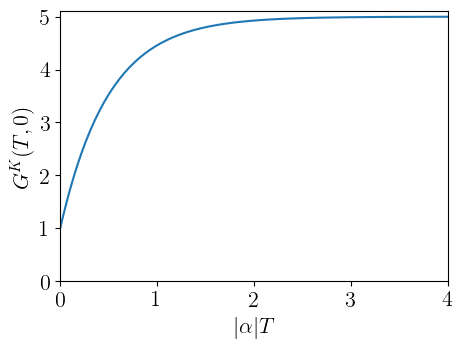

PyObject Text(34.15879923755966, 0.5, '$G^K(T, 0)$')

In [5]:
figure(figsize=(11, 3.5))
subplot(121)
plot(sol.t, [-GK.data[k, k] |> imag for k in 1:n+1])
xlim(0, abs(α) * T)
ylim(0, 5.1)
yticks([0, 1, 2, 3, 4, 5])
xlabel("\$|\\alpha|T\$")
ylabel("\$G^K(T, 0)\$")

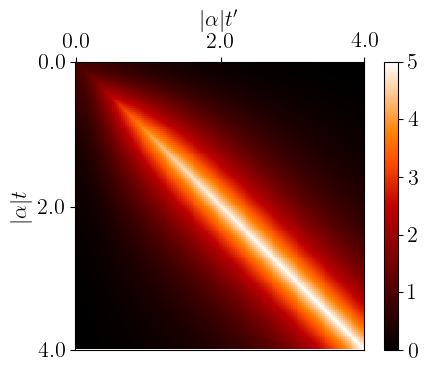

In [6]:
cmap = "gist_heat"
figure(figsize=(5, 4))

imshow(-GK.data |> imag, ColorMap(cmap))
colorbar(orientation="vertical")
ax = gca()
ax.set_xticks([0, n/2 +
        1, n + 1])
ax.set_xticklabels([0, abs(α) .*  T/2, abs(α) .* T])
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")
ax.set_yticks([0, n/2 + 1, n + 1])
ax.set_yticklabels([0, abs(α) .* T/2, abs(α) .*  T])
xlabel("\$|\\alpha|t'\$")
ylabel("\$|\\alpha|t\$")
clim((0, 5))
tight_layout()